### DataFrame Task

In [25]:
import pandas as pd

# 아래의 dict를 DataFrame으로 변환한다.
# 전체 가격을 20%씩 인상한다.

fruit = {
    "Name": ["사과", "딸기", "감", "참외"],
    "Price": [2000, 8000, 13000, 6000]
}

fruit_df = pd.DataFrame(fruit)
fruit_df["Price"] = fruit_df[["Price"]] * 1.2
fruit_df["Price"] = fruit_df["Price"].astype('int32')

display(fruit_df)

,Name,Price
0,사과,2400
1,딸기,9600
2,감,15600
3,참외,7200


### describe() Task
- happiness_report_2023.csv 파일을 불러온 뒤 아래 정보를 확인하세요.
<img src="./images/happiness_report_2023.png" width="350" style="margin-left: 20px">

,country,region,happiness_score,gdp_per_capita
0,Finland,Western Europe,7.804,1.888
1,Denmark,Western Europe,7.586,1.949
2,Iceland,Western Europe,7.530,1.926


,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.724,5.684,6.334,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.099,1.449,1.798,2.200


,happiness_score
0,5.277
1,6.125
2,6.144


,gdp_per_capita
0,0.914
1,1.417
2,1.714
3,1.798


<Axes: xlabel='happiness_score'>

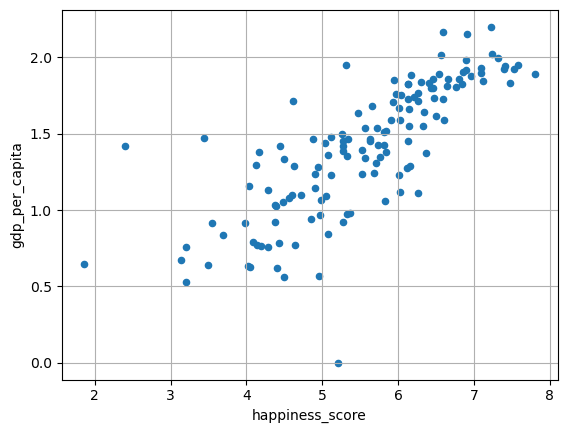

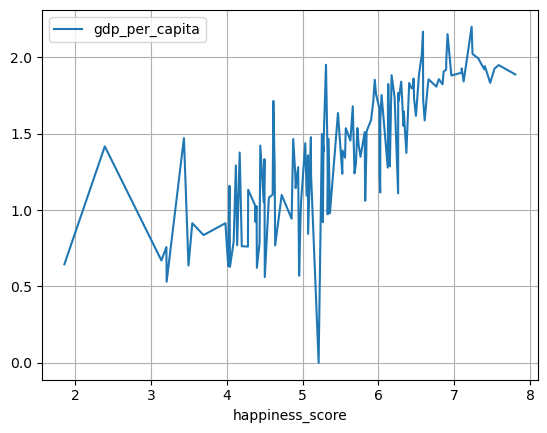

In [26]:
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
# display(happiness_df)
# 아래 4가지 컬럼으로 축소한 뒤 상위 3개의 데이터를 출력하고
# country, region, happiness_score, gdp_per_capita
happiness_df_gdp = happiness_df[["country", "region", "happiness_score", "gdp_per_capita"]]
display(happiness_df_gdp.head(3))

# 평균, 표준편차, 최소값, 4분위 분포도, 최대값을 출력하세요.
display(happiness_df_gdp.describe().T)


# 행복지수 최빈값 상위 3개와 1인당 GDP 최빈값 상위 4개를 출력하세요.
display(happiness_df_gdp[["happiness_score"]].mode().head(4))
display(happiness_df_gdp[["gdp_per_capita"]].mode().head(5))


# 행복지수와 1인당 GDP를 활용하여 분포도(scatter) 그래프와 선(line) 그래프를 출력하세요.
happiness_df_gdp.plot(x="happiness_score", y="gdp_per_capita", grid=True, kind="scatter")
happiness_df_gdp.plot(x="happiness_score", y="gdp_per_capita", grid=True, kind="line")

### value_counts() Task

In [27]:
# region별 개수 출력
happiness_df['region'].value_counts()

region
Sub-Saharan Africa                    33
Central and Eastern Europe            22
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          14
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Commonwealth of Independent States     4
Name: count, dtype: int64

### index Task

In [28]:
# region이 Sub-Saharan Africa인 행 인덱스 출력
happiness_df[happiness_df['region'] == 'Sub-Saharan Africa'].index

Index([ 58,  84,  85,  90,  92,  93,  94,  95,  96, 101, 102, 103, 104, 106,
       108, 110, 112, 113, 115, 118, 119, 121, 123, 124, 126, 127, 128, 129,
       130, 131, 132, 133, 134],
      dtype='int64')

### drop() Task

In [29]:
# region이 Sub-Saharan Africa인 행 삭제
happiness_df_region = happiness_df.drop(happiness_df[happiness_df['region'] == 'Sub-Saharan Africa'].index, axis=0)
happiness_df_region[happiness_df['region'] == 'Sub-Saharan Africa'].count()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9596\2701870937.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  happiness_df_region[happiness_df['region'] == 'Sub-Saharan Africa'].count()


country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

### rename() Task

In [37]:
# gdp_per_capita를 정수(int16)로 반올림 후 새로운 컬럼인 gdp_per_capita_int에 저장
happiness_df['gdp_per_capita_int'] = round(happiness_df['gdp_per_capita'], 0).astype('int16')

# gdp_per_capita_int 컬럼명을 gdp_int로 변경
happiness_df = happiness_df.rename(columns={'gdp_per_capita_int': 'gdp_int'}, inplace=False)
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,gdp_int
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2
...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068,1
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117,1
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051,1
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027,1


### Indexing Task

In [41]:
# region이 Western Europe인 행 조회
happiness_df[happiness_df['region'] == 'Western Europe']

# gdp_per_capita가 2이상인 country 조회 후 index 재정렬
happiness_df[happiness_df.loc[:, 'gdp_per_capita'] >= 2].loc[:, ['country', 'gdp_per_capita']].reset_index(drop=True)

,country,gdp_per_capita
0,Switzerland,2.022
1,Luxembourg,2.200
2,Ireland,2.152
3,Singapore,2.168
4,United Arab Emirates,2.015


### sort_values() Task

In [42]:
# country, region, happiness_score, healthy_life_expectancy를 추출한 뒤 healthy_life_expectancy를 기준으로 내림차순 후 출력
columns = ['country', 'region', 'happiness_score', 'healthy_life_expectancy']
happiness_df[columns].sort_values(by='healthy_life_expectancy', ascending=False)

,country,region,happiness_score,healthy_life_expectancy
81,Hong Kong S.A.R. of China,East Asia,5.308,0.702
46,Japan,East Asia,6.129,0.622
24,Singapore,Southeast Asia,6.587,0.607
56,South Korea,East Asia,5.951,0.603
7,Switzerland,Western Europe,7.240,0.582
...,...,...,...,...
90,Guinea,Sub-Saharan Africa,5.072,0.072
133,Zimbabwe,Sub-Saharan Africa,3.204,0.069
113,Chad,Sub-Saharan Africa,4.397,0.043
96,Mozambique,Sub-Saharan Africa,4.954,0.000


### Aggregation Task

In [43]:
# 1인당 GDP 평균
happiness_df.gdp_per_capita.mean()

1.406985401459854

In [44]:
# happiness_score 최대값과 최소값
happiness_df.happiness_score.max(), happiness_df.happiness_score.min()

(7.804, 1.859)

### groupby() Task

In [47]:
# 지역별 happiness_score 평균
display(happiness_df.groupby(by='region')[['happiness_score']].mean())

# 국가별 social_support 총 합, social_support 내림차순 정렬
happiness_df.groupby(by='country')[['social_support']].sum().sort_values(by='social_support', ascending=False)

,happiness_score
region,
Central and Eastern Europe,5.967091
Commonwealth of Independent States,5.828250
East Asia,5.930167
Latin America and Caribbean,5.966053
Middle East and North Africa,5.102143
North America and ANZ,7.018250
South Asia,4.089000
Southeast Asia,5.431222
Sub-Saharan Africa,4.382485


,social_support
country,
Iceland,1.620
Finland,1.585
Denmark,1.548
Slovakia,1.544
Czechia,1.544
...,...
Malawi,0.479
Lebanon,0.476
Comoros,0.327


### isna(), fillna() Task

In [50]:
# 결측치를 검사한 뒤 평균값으로 대체
print(happiness_df.isna().sum())

happiness_df['healthy_life_expectancy'] = happiness_df['healthy_life_expectancy'].fillna(happiness_df.healthy_life_expectancy.mean())
print(happiness_df.isna().sum())

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
gdp_int                         0
dtype: int64
country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
gdp_int                         0
dtype: int64
